# Assignment 1 ID5030 (ME21D406)

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Read CSV file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cement_data = pd.read_excel('/content/drive/MyDrive/ID5030 Assignments/Assignment_1/Concrete_Data.xls')

In [ ]:
cement_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
cement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## Show correlation between different variables

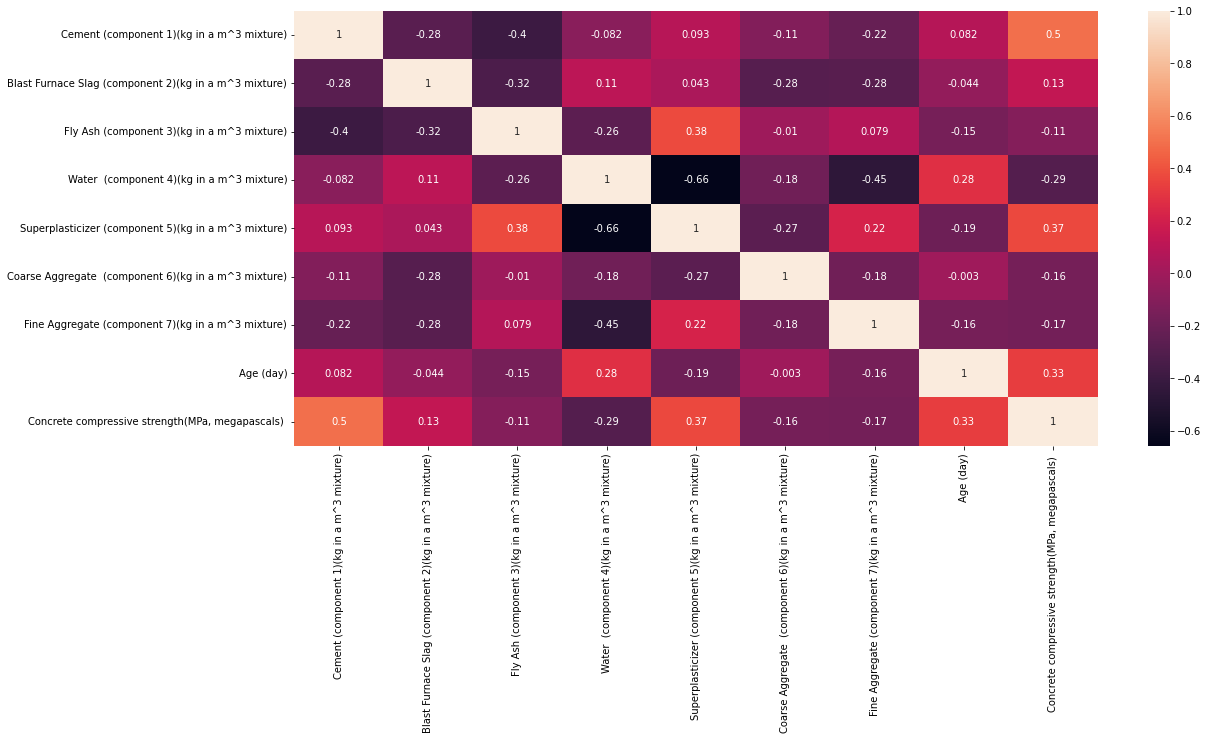

In [ ]:
plt.figure(figsize=[18,8])
sb.heatmap(cement_data.corr(),annot=True)

## Splitting the data into independent and dependent variables

In [ ]:
# independent variables
x = cement_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
# dependent variables
y = cement_data['Concrete compressive strength(MPa, megapascals) ']

## Splitting the data into training set and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 63)

## Feature Scaling 

In [ ]:
# feature scaling
scaler = StandardScaler()
Fit = scaler.fit(x_train)
x_train_scaled = Fit.transform(x_train)
x_test_scaled = Fit.transform(x_test)

## Linear Regression

In [ ]:
lr = LinearRegression()
linear_fit = lr.fit(x_train_scaled, y_train)
y_test_predicted = lr.predict(x_test_scaled)
y_train_predicted = lr.predict(x_train_scaled)

## Metrics for the model

In [ ]:
score_test = r2_score(y_test, y_test_predicted)
score_train = r2_score(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)
MSE_train = mean_squared_error(y_train, y_train_predicted)

print('R2 score for training set is: {}'.format(score_train))
print('R2 score for test set is: {}'.format(score_test))
print("Mean Squared Error for training set is: {}".format(MSE_train))
print("Mean Squared Error for test set is: {}".format(MSE_test))

R2 score for training set is: 0.6234984376567261
R2 score for test set is: 0.5783293758164179
Mean Squared Error for training set is: 107.60408931464686
Mean Squared Error for test set is: 110.35856689002169


## Plots

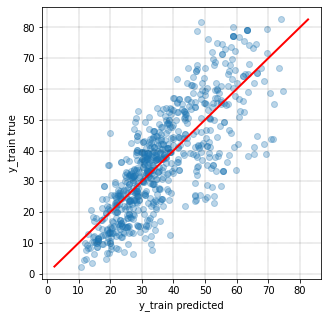

In [ ]:
plt.figure(figsize=[5,5])
plt.scatter(y_train_predicted,y_train,alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red',linewidth=2)
plt.xlabel('y_train predicted')
plt.ylabel('y_train true')
plt.grid(color='black',linestyle='--',linewidth=0.2)
plt.show()

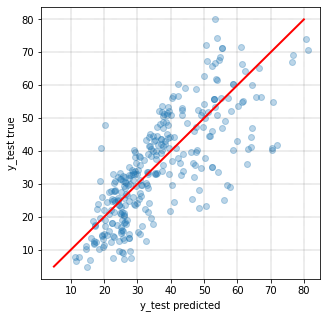

In [ ]:
plt.figure(figsize=[5,5])
plt.scatter(y_test_predicted,y_test,alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linewidth=2)
plt.xlabel('y_test predicted')
plt.ylabel('y_test true')
plt.grid(color='black',linestyle='--',linewidth=0.2)
plt.show()